In [1]:
# import libraries
import numpy as np
np.set_printoptions(precision = 4, suppress = True)
import pandas as pd
import os
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import gaussian_kde

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
out_dir = "./data/out"
optim_dir = os.path.join(out_dir,"genetic-algorithm")
res_dir = os.path.join(optim_dir, "48-xrp-max-1474.83")

In [3]:
progress = pd.read_csv(os.path.join(res_dir, "progress.csv"))
progress.tail(10)

,mean fitness,best fitness,population size
30,925.002063,1474.829712,446
31,933.052014,1474.829712,448
32,938.316120,1474.829712,450
33,931.229663,1474.829712,452
34,951.684257,1474.829712,454
35,918.041336,1474.829712,456
36,932.680058,1474.829712,458
37,930.942360,1474.829712,460
38,945.357865,1474.829712,462
39,946.878831,1474.829712,464


In [4]:
mean_fitness_idx = "mean fitness"
best_fitness_idx = "best fitness"

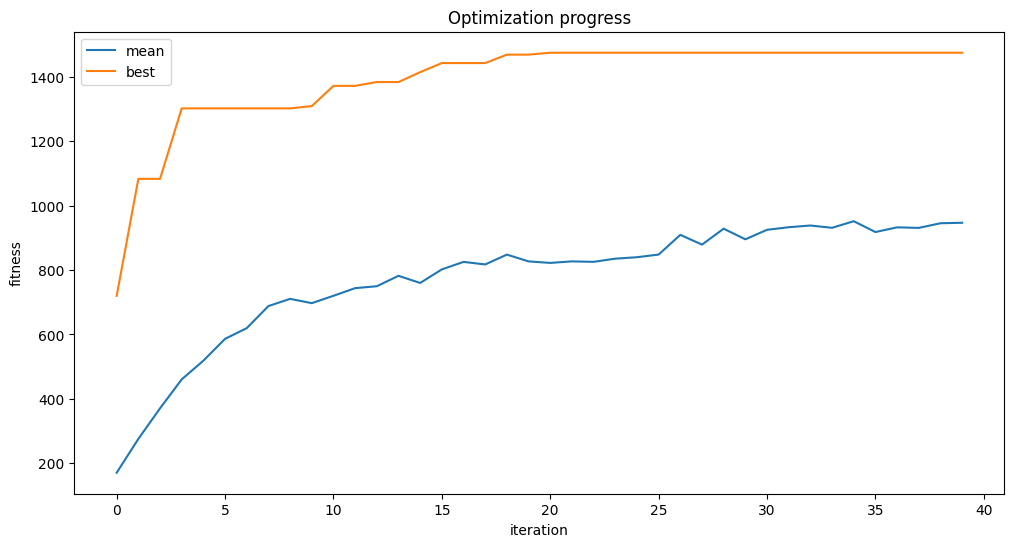

In [5]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)

ax.plot(progress[mean_fitness_idx], label="mean")
ax.plot(progress[best_fitness_idx], label="best")
ax.set_title("Optimization progress")
ax.set_xlabel("iteration")
ax.set_ylabel("fitness")
ax.legend();

In [6]:
progress_path = os.path.join(res_dir, "progress.png")
fig.savefig(progress_path, bbox_inches='tight', dpi=200)